<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/ANN_Heart_Disease_Prediction_With_MCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikeras


In [2]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [3]:
import os
os.listdir()


['.config', 'heart.csv', 'sample_data']

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 12)
Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4460 - loss: 0.7644 - val_accuracy: 0.6190 - val_loss: 0.6512
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7091 -

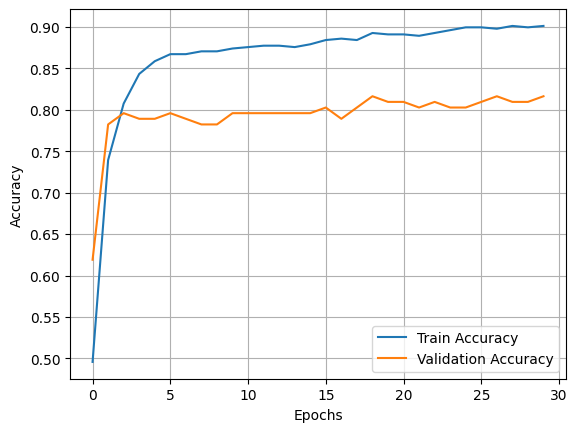

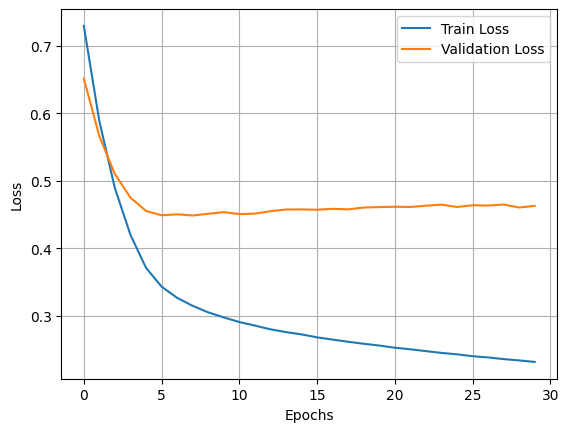

Test Accuracy: 0.8696
Test Loss: 0.3884
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.89      0.80      0.85        82
           1       0.85      0.92      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

Matthews Correlation Coefficient (MCC): 0.7364


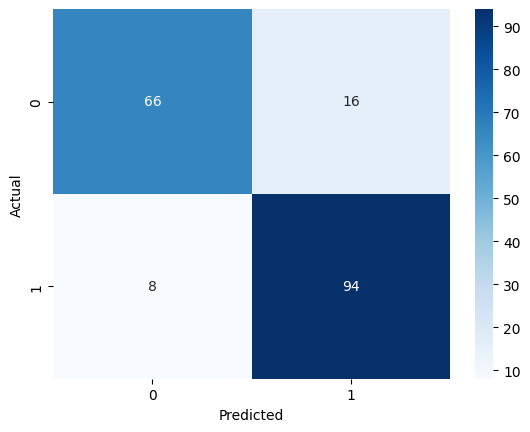


Training Fold 1...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Fold 1 Accuracy: 0.8231
Fold 1 MCC: 0.6425

Training Fold 2...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Fold 2 Accuracy: 0.8639
Fold 2 MCC: 0.7254

Training Fold 3...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Fold 3 Accuracy: 0.8367
Fold 3 MCC: 0.6624

Training Fold 4...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold 4 Accuracy: 0.8095
Fold 4 MCC: 0.6209

Training Fold 5...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Fold 5 Accuracy: 0.8767
Fold 5 MCC: 0.7500

Cross-Validation Accuracies: [0.8231292366981506, 0.8639456033706665, 0.8367347121238708, 0.8095238208770752, 0.8767123222351074]
Mean CV Accuracy: 0.8420091390609741
Std Accuracy: 0.02500034231398282

Cross-Validation MCCs: [np.float64(0.6425364758698092), np.float64(0.7253536514615552), np.float64(0.662396294827832), np.float64(0.6208930389796964), np.float64(0.7499567666900132)]
Mean CV MCC: 0.6802272455657812
Std MCC: 0.04931061472133363


In [5]:
# ================================
# 1. Importing libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import matthews_corrcoef

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

# ================================
# 2. Load the data
# ================================
# File is CSV but named as .xls
data = pd.read_csv("heart.csv")
print(data.head())
print(data.shape)

#data = pd.read_csv("heart.csv.xls")

#print(data.head())
#print(data.shape)

# ================================
# 3. Data preprocessing
# ================================

# Target column
target_col = "HeartDisease"

# Separate features & target
X = data.drop(columns=[target_col])
y = data[target_col]

# Encode categorical columns
cat_cols = X.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================================
# 4. ANN Model
# ================================
def ann_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary output

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

# ================================
# 5. Accuracy & Loss Plots
# ================================
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# ================================
# 6. Model Evaluation
# ================================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ================================
# 7. Cross Validation
# ================================
# ================================
# 7. Manual K-Fold Cross Validation
# ================================

from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracies = []
cv_mccs = []
fold = 1

for train_idx, val_idx in kfold.split(X_train):
    print(f"\nTraining Fold {fold}...")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = ann_model()

    model.fit(
        X_tr, y_tr,
        epochs=30,
        batch_size=32,
        verbose=0
    )

    # Evaluate accuracy
    loss, acc = model.evaluate(X_val, y_val, verbose=0)

    # Predictions for MCC
    y_val_pred = (model.predict(X_val) > 0.5).astype(int)
    mcc = matthews_corrcoef(y_val, y_val_pred)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} MCC: {mcc:.4f}")

    cv_accuracies.append(acc)
    cv_mccs.append(mcc)
    fold += 1

print("\nCross-Validation Accuracies:", cv_accuracies)
print("Mean CV Accuracy:", np.mean(cv_accuracies))
print("Std Accuracy:", np.std(cv_accuracies))

print("\nCross-Validation MCCs:", cv_mccs)
print("Mean CV MCC:", np.mean(cv_mccs))
print("Std MCC:", np.std(cv_mccs))
